In [6]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [7]:
## Load housing data from scikit-learn library
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()
# boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# boston.head()
## Create new column of target values and add it to dataframe
# boston['MEDV'] = boston_dataset.target

attribute = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delim_whitespace=True, names=attribute)
# df.describe()
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


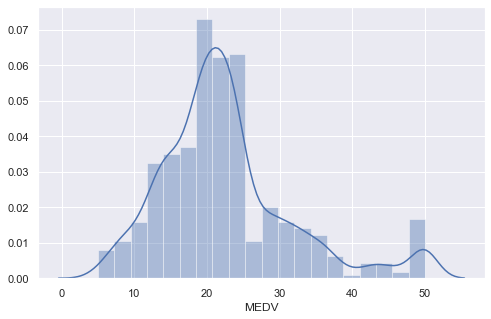

In [8]:
# Exploratory Data Analysis ()
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df['MEDV'], bins=20)
plt.show()
# Result - We see that the values of MEDV are distributed normally with few outliers

In [15]:
# create a correlation matrix that measures the linear relationships between the variables
# The correlation matrix can be formed by using the corr function from the pandas dataframe library
pd.set_option('precision', 2)
df.corr(method='pearson')
# Result - Select those features which have a high correlation with our target variable MEDV. By looking at the correlation 
# matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation 
# with MEDV(-0.74)

# Important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, 
# TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these 
# features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


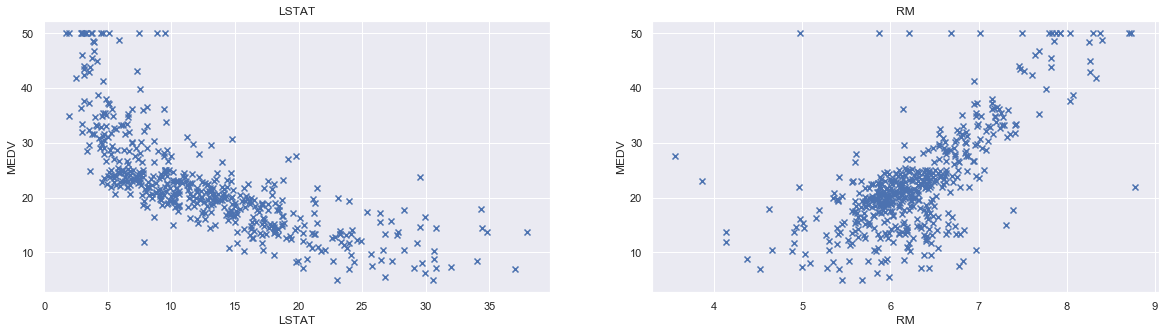

In [20]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='x')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
# The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
# The prices tend to decrease with an increase in LSTAT.

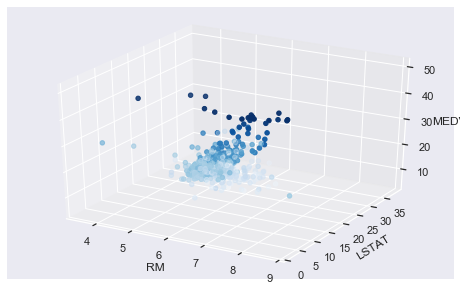

In [18]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
xdata = df['RM']
ydata = df['LSTAT']
zdata = df['MEDV']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV');